# Entanglement circuit

In this note book, the goal is to test IBM Q Experience with a simple circuit that entangle two qubits.

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

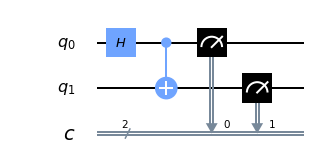

In [2]:
# Build the circuit
circuit = QuantumCircuit(2, 2) # 2 qubits and 2 bits
circuit.h(0)     # h q[0];
circuit.cx(0, 1) # cx q[0], q[1];
circuit.measure([0, 1], [0, 1]) # measure

# Visualize  and measure q[0] -> c[1];the circuit
circuit.draw()

results:  {'10': 18, '00': 558, '01': 19, '11': 429}


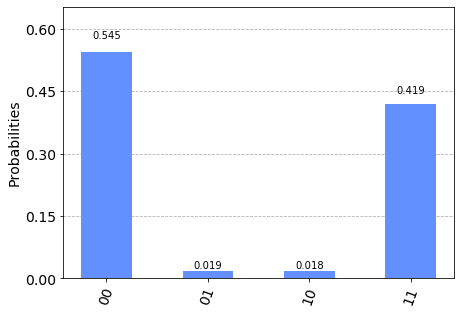

In [3]:
# Run
backend = provider.get_backend('ibmq_vigo')
job = execute(circuit, backend, shots=1024)
job_monitor(job)
result = job.result()
counts = result.get_counts(circuit)
print("results: ", counts)
plot_histogram(counts)

## Conclusion

The circuit behave almost as expected.
We can see that with a real quantum computer, there are errors even on a small circuit composed of 2 quantum gates (01 and 10 should have a probability of 0).